In [1]:
from google.colab import drive
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/outer_folder.zip" -d "/content/drive/My Drive/"

unzip:  cannot find or open /content/drive/My Drive/outer_folder.zip, /content/drive/My Drive/outer_folder.zip.zip or /content/drive/My Drive/outer_folder.zip.ZIP.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = os.listdir('/content/drive/MyDrive/data/train/')
classes = {'notumor':0, 'Glioma':1, 'Pituitary_tumor':2, 'Meningioma': 3}

In [ ]:
# !pip install opencv-python
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/data/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
pd.Series(Y).value_counts()

1    6301
2    6146
3    5951
0    1595
dtype: int64

In [ ]:
X.shape, X_updated.shape

((19993, 200, 200), (19993, 40000))

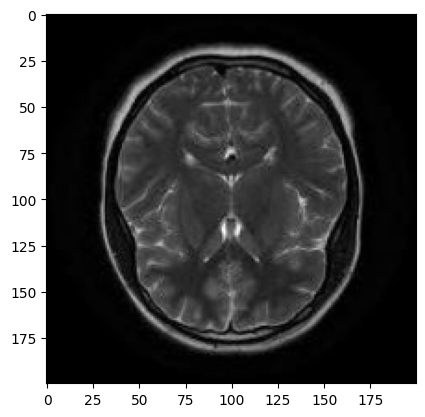

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(19993, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((15994, 40000), (3999, 40000))

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(15994, 40000) (3999, 40000)


In [ ]:
import cv2
X = []
Y = []
classes = {'notumor':0, 'Glioma':1, 'Pituitary_tumor':2, 'Meningioma': 3}
for cls in classes:
    pth = '/content/drive/MyDrive/Testing/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
xtest = X_updated
ytest = Y
print(xtest.max(), xtest.min())
xtest = xtest/255
print(xtest.max(), xtest.min())

255 0
1.0 0.0


In [ ]:
pca = PCA(.98)
pca_test = xtest

In [ ]:
# !unzip "/content/Testing.zip" -d "/content/drive/My Drive/"

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [ ]:
if os.path.isdir('/content/drive/MyDrive/data/train/Glioma') is True:
    print("Yes")

Yes


In [ ]:
train_path = '/content/drive/MyDrive/data/train'
val_path = '/content/drive/MyDrive/data/val'

In [ ]:
#the preprocessig funviotn that is going to apply some preprocesing on the image before passing it to the model,
#we are processing them in the same format as the VGG16 model takes in data
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(256,256),classes=['notumor' ,'Glioma','Meningioma','Pituitary_tumor'],batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path,target_size=(256,256),classes=['notumor', 'Glioma','Meningioma','Pituitary_tumor'],batch_size=32)


Found 19993 images belonging to 4 classes.
Found 828 images belonging to 4 classes.


In [ ]:
# assert train_batches.n == 18398
# assert valid_batches.n == 828
assert train_batches.num_classes == valid_batches.num_classes == 4

In [ ]:
imgs,labels = next(train_batches)

In [ ]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


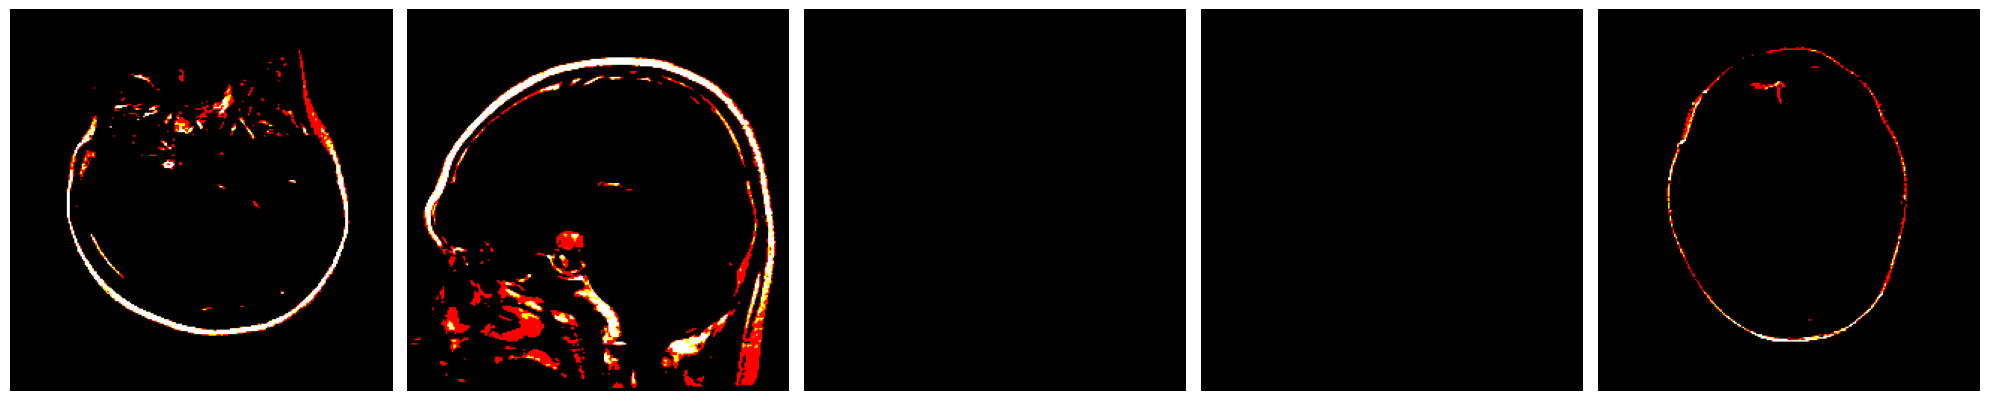

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

#freezing all layers in pre-trained model

In [ ]:
x = Flatten()(vgg16.output)
x = Dense(4, activation='softmax')(x)
# ouput layer

In [ ]:
model = Model(inputs=vgg16.input, outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_batches, epochs=25,verbose=2)

Epoch 1/25
625/625 - 218s - loss: 2.5972 - accuracy: 0.8751 - 218s/epoch - 349ms/step
Epoch 2/25
625/625 - 186s - loss: 1.0594 - accuracy: 0.9444 - 186s/epoch - 297ms/step
Epoch 3/25
625/625 - 184s - loss: 0.7591 - accuracy: 0.9636 - 184s/epoch - 294ms/step
Epoch 4/25
625/625 - 188s - loss: 0.6452 - accuracy: 0.9670 - 188s/epoch - 301ms/step
Epoch 5/25
625/625 - 184s - loss: 0.5715 - accuracy: 0.9712 - 184s/epoch - 294ms/step
Epoch 6/25
625/625 - 183s - loss: 0.5368 - accuracy: 0.9754 - 183s/epoch - 293ms/step
Epoch 7/25
625/625 - 183s - loss: 0.6466 - accuracy: 0.9757 - 183s/epoch - 293ms/step
Epoch 8/25
625/625 - 183s - loss: 0.4585 - accuracy: 0.9774 - 183s/epoch - 292ms/step
Epoch 9/25
625/625 - 185s - loss: 0.6029 - accuracy: 0.9781 - 185s/epoch - 296ms/step
Epoch 10/25
625/625 - 189s - loss: 0.6082 - accuracy: 0.9808 - 189s/epoch - 303ms/step
Epoch 11/25
625/625 - 182s - loss: 0.3411 - accuracy: 0.9856 - 182s/epoch - 291ms/step
Epoch 12/25
625/625 - 184s - loss: 0.4841 - accuracy

In [ ]:
val_loss, val_acc = model.evaluate(valid_batches)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

26/26 [==============================] - 202s 8s/step - loss: 11.0152 - accuracy: 0.9469
Validation Loss: 11.015168190002441
Validation Accuracy: 0.9468598961830139


In [ ]:
model.save('/content/', 'VGG16')

In [ ]:
import os.path

if os.path.isfile('/content/medical_trial.h5') is False:
  model.save('/content/medical_trial.h5')
  model.save('/content/drive/MyDrive/medical_trial.h5')



In [3]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/MyDrive/medical_trial.h5')

In [4]:
# Test dataset path
test_path = '/content/drive/MyDrive/Testing'

In [12]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(256,256),classes=['notumor', 'Glioma','Meningioma','Pituitary_tumor'],batch_size=32)

Found 1311 images belonging to 4 classes.


In [13]:
# Testing model
predictions = new_model.predict(test_batches)
print("Predictions:", predictions)
print("Ground Truth Labels:", test_batches.classes)

41/41 [==============================] - 157s 4s/step
Predictions: [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Ground Truth Labels: [0 0 0 ... 3 3 3]


In [14]:
print(test_batches.num_classes)
print(test_batches.class_indices)
assert test_batches.num_classes == 4

4
{'notumor': 0, 'Glioma': 1, 'Meningioma': 2, 'Pituitary_tumor': 3}


In [15]:
np.unique(test_batches.classes)

array([0, 1, 2, 3], dtype=int32)

In [16]:
print(ytest)

NameError: ignored

In [ ]:
# import seaborn as sns
# # Creating  a confusion matrix,which compares the y_test and y_pred
# cm = confusion_matrix(test_batches.classes, predictions)
# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
# cm_df = pd.DataFrame(cm,
#                      index = ['Glioma','Pituitory_tumor ','Meningioma'],
#                      columns = ['Glioma','Pituitory_tumor ','Meningioma'])
# #Plotting the confusion matrix
# plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()
# print("Confusion Matrix:\n", cm)

In [17]:
rounded_predictions = np.argmax(predictions,axis=1)
# print(test_batches[0][0])

In [19]:
loss, accuracy = new_model.evaluate(test_batches)

41/41 [==============================] - 10s 222ms/step - loss: 103.7996 - accuracy: 0.8658


In [20]:
print("loss: ", loss)
print("accuracy: ",  accuracy)

loss:  103.79956817626953
accuracy:  0.865751326084137


In [21]:
test_batches.classes.ndim

1

In [22]:
from sklearn.metrics import classification_report
y_pred = np.argmax(predictions, axis=1)

# Get the true class labels
y_true = test_batches.classes

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.36      0.32       405
           1       0.26      0.27      0.27       300
           2       0.25      0.14      0.18       306
           3       0.20      0.22      0.21       300

    accuracy                           0.26      1311
   macro avg       0.25      0.25      0.25      1311
weighted avg       0.26      0.26      0.25      1311



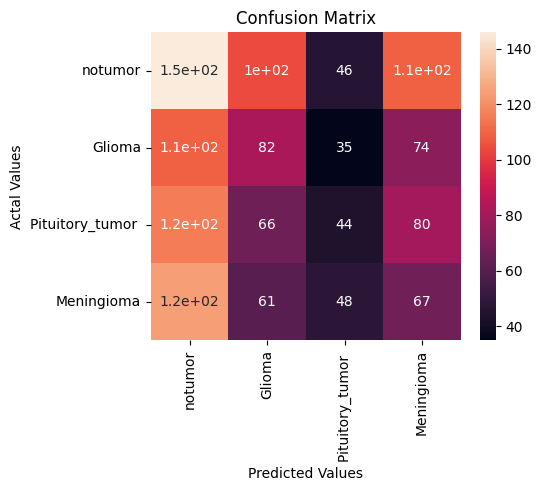

Confusion Matrix:
 [[146 104  46 109]
 [109  82  35  74]
 [116  66  44  80]
 [124  61  48  67]]


In [23]:
import seaborn as sns

preds_classes = np.argmax(predictions, axis=1)

# Get the true class indices
true_classes = test_batches.classes

# Get the class labels
class_labels = list(test_batches.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, preds_classes)

cm_df = pd.DataFrame(cm,
                     index = ['notumor','Glioma','Pituitory_tumor ','Meningioma'],
                     columns = ['notumor', 'Glioma','Pituitory_tumor ','Meningioma'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
print("Confusion Matrix:\n", cm)